In [1]:
from Framework import Confounder_Injection as CI
from Framework import Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch

# Experiments

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

### NeuralNetwork

With the test_network class it's easy to test new combinations parameters

Training took  2.5189599990844727 s


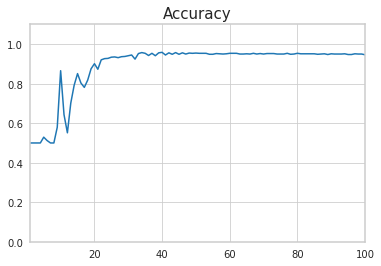

With mean accuracy= 0.8901466992665037


In [2]:
model = Models.NeuralNetwork(32*32)
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512)
acc, loss = c.train(epochs=100, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (818, 2)


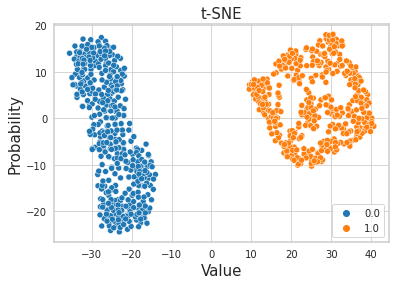

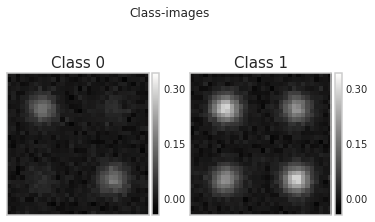

In [3]:
p = CI.plot()
p.tsne(c.train_x, c.train_y, 2)
p.class_images(c.train_x)

### ConvNet

Training took  4.228511571884155 s


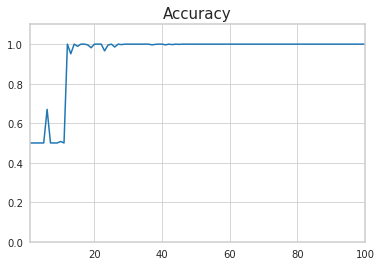

With mean accuracy= 0.9452689486552568


In [4]:
model = Models.LeNet_5()
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512)
acc, loss = c.train(epochs=100, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (818, 2)


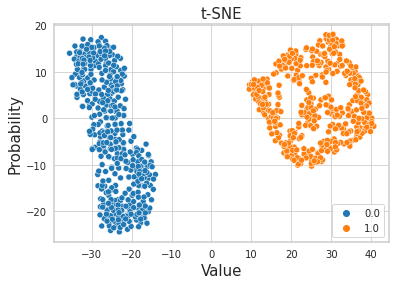

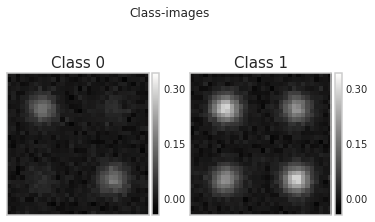

In [5]:
p = CI.plot()
p.tsne(c.train_x, c.train_y, 2)
p.class_images(c.train_x)

### Br_Net

Training took  3.158337116241455 s


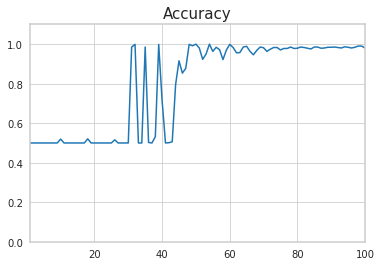

With mean accuracy= 0.7903056234718828


In [6]:
model = Models.Br_Net()
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512)
acc, loss = c.train(epochs=100, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (818, 2)


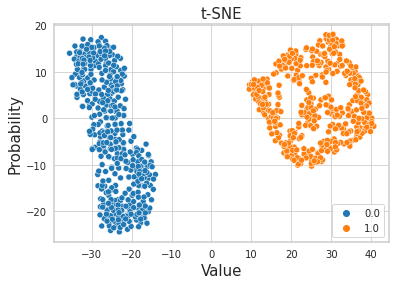

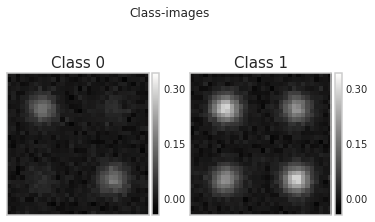

In [7]:
p = CI.plot()
p.tsne(c.train_x, c.train_y, 2)
p.class_images(c.train_x)